In [2]:
from pyod.models.lof import LOF 
from src.bisect.bisect import BisectHOGen
import tensorflow as tf

#get mnist data
X_train = tf.keras.datasets.mnist.load_data()[0][0]
X_train = X_train.reshape(-1, 28*28)[:1000]


In [3]:
bisect = BisectHOGen(data=X_train, outlier_detection_method=LOF)
fake_points = bisect.fit_generate(gen_points=100, n_jobs=-1)

2023-09-08 15:04:51,640 - INFO - Starting with parameters: gen_points=500, check_fast=True, fixed_interval_length=True, get_origin_type=weighted, verbose=True, n_jobs=-2
2023-09-08 15:04:51,641 - DEBUG - Created temporary directory /var/folders/sl/21_hwnxd69d2xlknhgk767mr0000gn/T/tmpetbrehw0
2023-09-08 15:04:51,755 - INFO - Fitting all subspaces....
2023-09-08 15:04:51,755 - DEBUG - number of jobs in parallel: -2
2023-09-08 15:05:00,857 - INFO - Fitting in the full space....
2023-09-08 15:05:01,081 - INFO - number of fitted subspaces including full space: 2047
2023-09-08 15:05:03,388 - DEBUG - Length: 14.646819957629143
2023-09-08 15:05:03,389 - DEBUG - given Origin method: weighted
2023-09-08 15:05:03,389 - DEBUG - Calculating probability vector...
2023-09-08 15:05:03,405 - DEBUG - Done!
2023-09-08 15:05:03,408 - DEBUG - Origin: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

In [4]:
fake_points.shape

(500, 784)

2023-09-08 15:05:48,046 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-09-08 15:05:48,047 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-09-08 15:05:48,049 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-09-08 15:05:48,049 - DEBUG - findfont: score(FontEntry(fname='/Users/david/anaconda3/envs/bisect/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-09-08 15:05:48,049 - DEBUG - findfont: score(FontEntry(fname='/Users/david/anaconda3/envs/bisect/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
2023-09-08 15:05:48,049 - DEBUG - findfont: sc

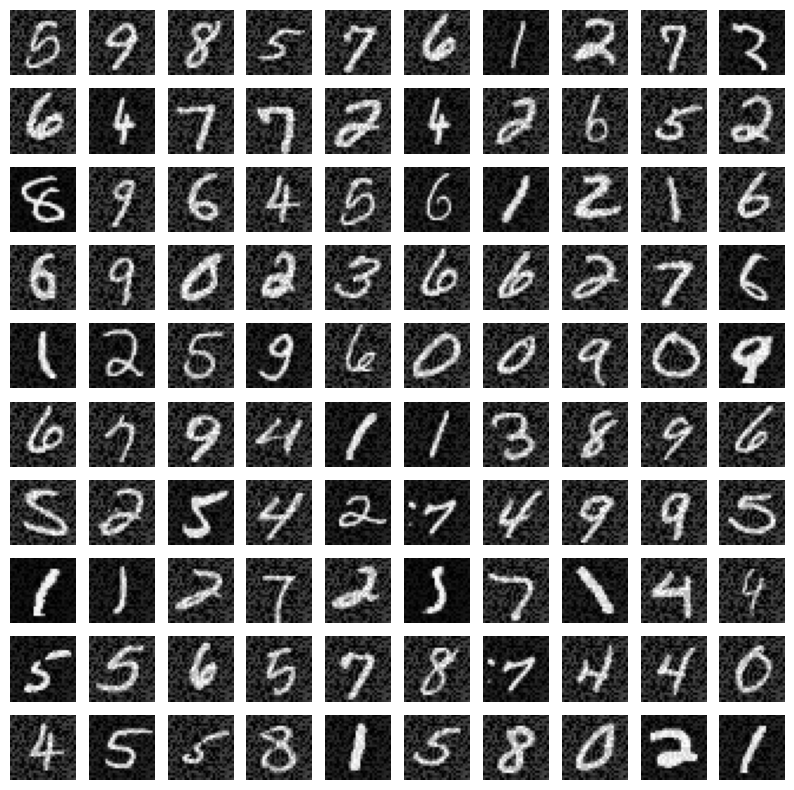

In [5]:
import matplotlib.pyplot as plt

nrows = 10
ncols = 10

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
for i in range(nrows):
    for j in range(ncols):
        axes[i, j].imshow(fake_points[i*ncols+j].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')  
plt.show()

In [13]:
bisect.print_summary()

Hidden Outlier Generation Method Object

Outlier detection method used: LOF
Synthetic HO generation method employed: bisect.

Database summary:

* Number of features: 784
* Total number of data points: 1000
* Total amount of synthetic data generated: 500
	...of which hidden outliers: 500
* Number of H1 outliers: 500
* Number of H2 outliers: 0.

Total execution time: 12.760510921478271.
